Link Dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

Nama : Dimas Ramadhan Alfinsyah

NIM  : 22.11.4742

# Import library

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Set matplotlib untuk menampilkan plot di notebook
%matplotlib inline

# Optional: Set tema seaborn (opsional)
sns.set_theme()

# Pengumpulan Data

In [ ]:
# Load dataset
dataset_path = '/content/heart.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Tampilkan 10 baris pertama
print("10 Baris Pertama Dataset:")
print(data.head(10))

10 Baris Pertama Dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0      

In [ ]:
# Ukuran data
print("\nUkuran Dataset:", data.shape)


Ukuran Dataset: (918, 12)


In [ ]:
# Informasi data
print("\nInformasi Dataset:")
data.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Preprocessing

In [ ]:
# Handling missing values
print("\nJumlah Missing Values Sebelum Penanganan:")
print(data.isnull().sum())
data.fillna(data.median(numeric_only=True), inplace=True)  # Mengisi nilai numerik yang hilang dengan median


Jumlah Missing Values Sebelum Penanganan:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Jumlah duplikasi
duplicates = data.duplicated().sum()
print("\nJumlah Duplikasi:", duplicates)
data.drop_duplicates(inplace=True)


Jumlah Duplikasi: 0


In [ ]:
# Melakukan encoding data
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})
data['ST_Slope'] = data['ST_Slope'].map({'Flat': 0, 'Up': 1})
data['ChestPainType'] = data['ChestPainType'].map({'TA': 0, 'ATA': 1,'NAP': 2, 'ASY': 3 })
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1})

In [ ]:
# Tampilkan 10 baris pertama setelah perubahan
print("\n10 Baris Pertama Setelah Perubahan:")
print(data.head(10))


10 Baris Pertama Setelah Perubahan:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              1        140          289          0         0.0   
1   49    1              2        160          180          0         0.0   
2   37    0              1        130          283          0         1.0   
3   48    1              3        138          214          0         0.0   
4   54    0              2        150          195          0         0.0   
5   39    0              2        120          339          0         0.0   
6   45    1              1        130          237          0         0.0   
7   54    0              1        110          208          0         0.0   
8   37    0              3        140          207          0         0.0   
9   48    1              1        120          284          0         0.0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0       1.0            

In [ ]:
# Informasi data setelah konversi
print("\nInformasi Dataset Setelah Konversi:")
data.info()


Informasi Dataset Setelah Konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      730 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        855 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB


# Exploratory Data Analysis

In [ ]:
# Visualisasi distribusi fitur numerik
numerical_cols = data.select_dtypes(include=[np.number]).columns
print("\nFitur Numerik:", list(numerical_cols))



Fitur Numerik: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


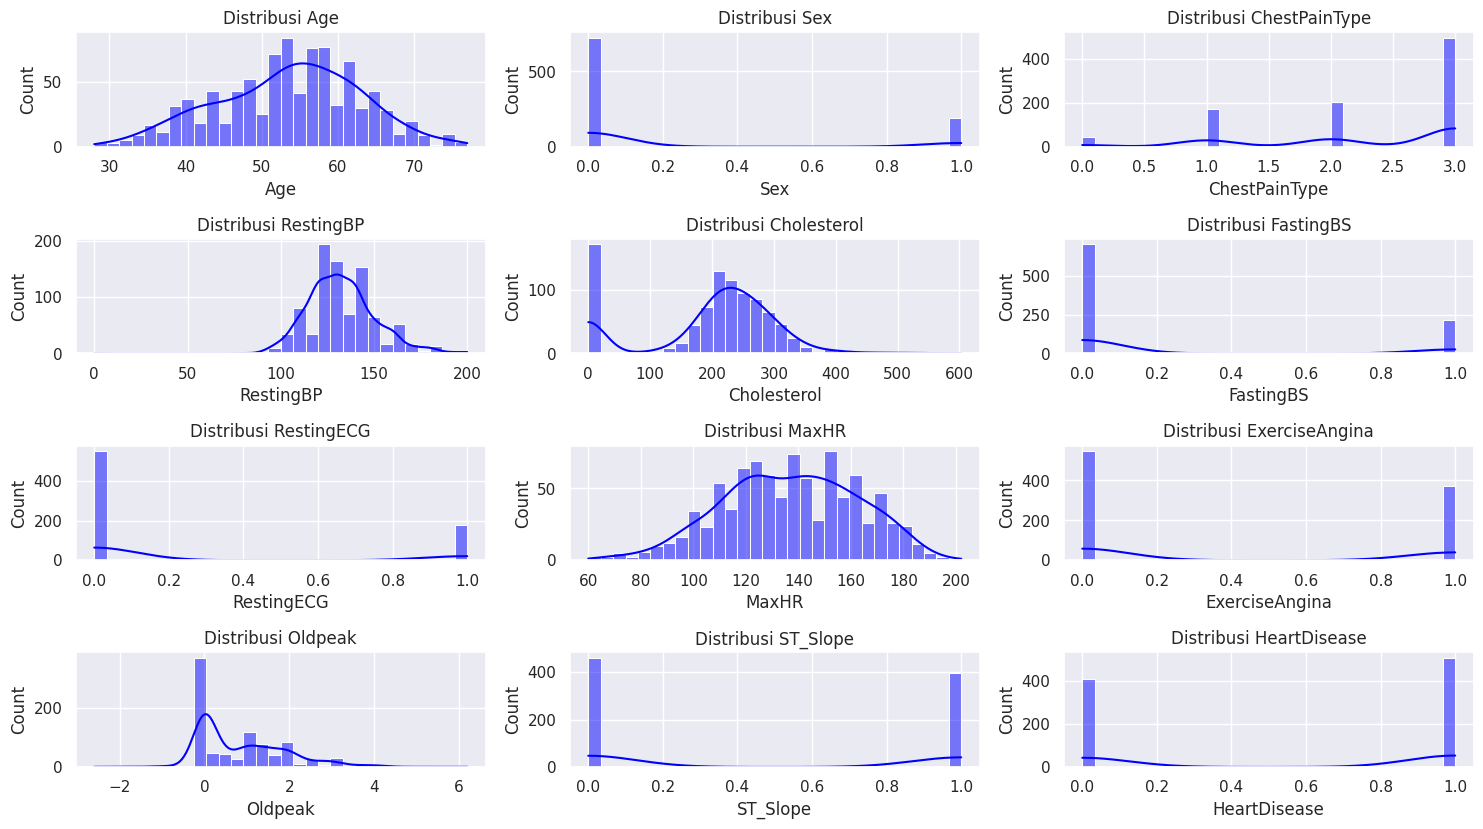

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

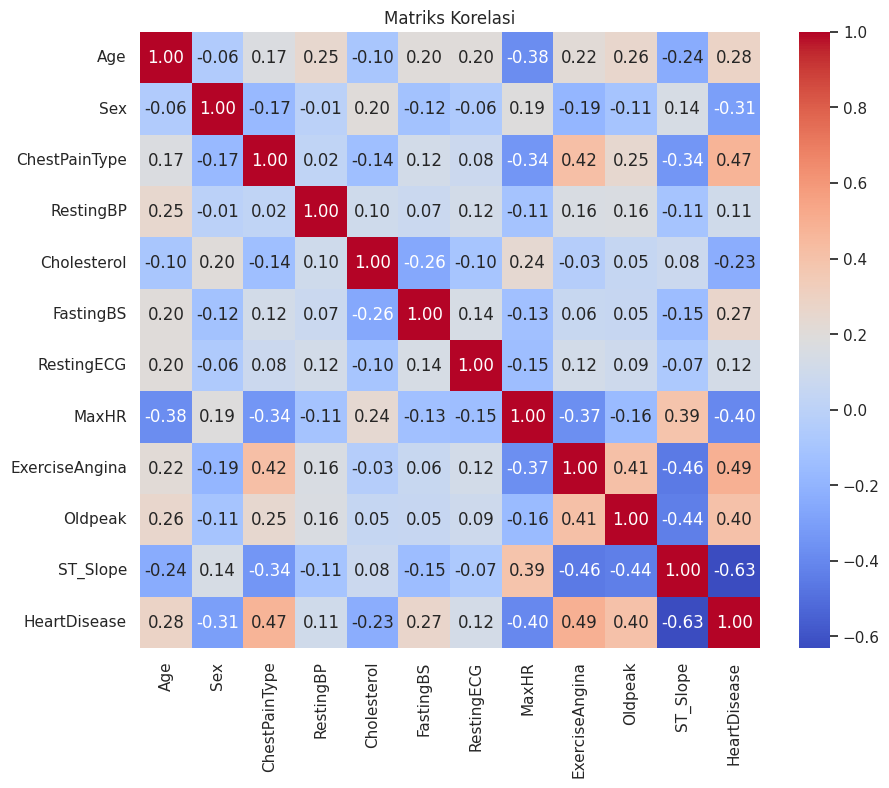

In [ ]:
# Analisis Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

# Seleksi Fitur

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 11)
(276, 11)
(642,)
(276,)


In [ ]:
# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Modeling

In [ ]:
# Inisialisasi model Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Melatih model pada data pelatihan
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data uji
y_pred = gbm_model.predict(X_test)

In [ ]:
# Mengukur akurasi model
accuracy_gbm = accuracy_score(y_test, y_pred)

In [ ]:
# Confusion matrix
cmr = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_labels = [f"{label}\n{value}" for label, value in zip(labels, cmr.flatten())]
cm_labels = np.array(cm_labels).reshape(2, 2)

In [ ]:
class_report = classification_report(y_test, y_pred)

In [ ]:
print('\nConfusion Matrix:')
print(cmr)


Confusion Matrix:
[[ 99  13]
 [ 24 140]]


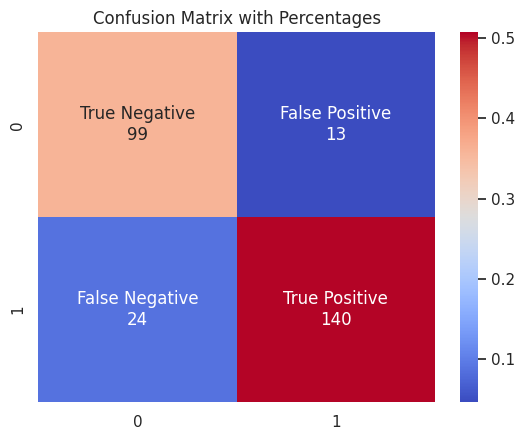

In [ ]:
# Plot confusion matrix
sns.heatmap(cmr / np.sum(cmr), annot=cm_labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})
plt.title('Confusion Matrix with Percentages')
plt.show()

# Evaluasi Model

In [ ]:
print("Accuracy (GBM):", accuracy_gbm)

Accuracy (GBM): 0.8659420289855072


In [ ]:
# Menampilkan informasi klasifikasi
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

